Dataset preview:
   Hours  Scores
0    2.5      21
1    5.1      47
2    3.2      27
3    8.5      75
4    3.5      30

Summary statistics:
           Hours     Scores
count  25.000000  25.000000
mean    5.012000  51.480000
std     2.525094  25.286887
min     1.100000  17.000000
25%     2.700000  30.000000
50%     4.800000  47.000000
75%     7.400000  75.000000
max     9.200000  95.000000

Actual vs Predicted Scores:
   Actual Scores  Predicted Scores
0             81         83.391686
1             30         27.070549
2             21         27.070549
3             76         69.796929
4             62         60.086388
5             25         29.012657
6             42         34.838982
7             47         52.317955

Mean Absolute Error (MAE): 4.50
Mean Squared Error (MSE): 23.62
R-squared (R²) Score: 0.95


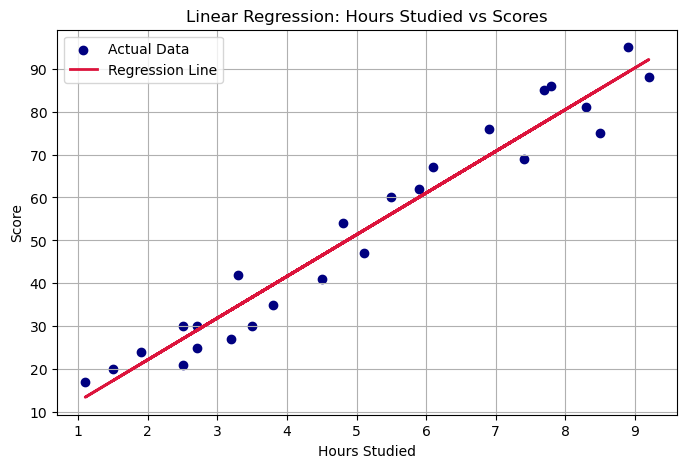


Predicted score for studying 9.35 hours: 93.59


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Load the dataset from the URL
data_url = "https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv"
student_data = pd.read_csv(data_url)

# Display basic info about dataset
print("Dataset preview:")
print(student_data.head())
print("\nSummary statistics:")
print(student_data.describe())

# Feature matrix and target variable
features = student_data[['Hours']]
target = student_data['Scores']

# Split the data: 80% training, 30% testing
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.3, random_state=42)

# Initialize and train linear regression model
regressor = LinearRegression()
regressor.fit(X_train, y_train)

# Predict scores on test set
predictions = regressor.predict(X_test)

# Compare actual and predicted values side by side
comparison = pd.DataFrame({'Actual Scores': y_test.values, 'Predicted Scores': predictions})
print("\nActual vs Predicted Scores:")
print(comparison)

# Calculate evaluation metrics
mae = mean_absolute_error(y_test, predictions)
mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

print(f"\nMean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R-squared (R²) Score: {r2:.2f}")

# Visualize regression results
plt.figure(figsize=(8, 5))
plt.scatter(features, target, color='navy', label='Actual Data')
plt.plot(features, regressor.predict(features), color='crimson', linewidth=2, label='Regression Line')
plt.title("Linear Regression: Hours Studied vs Scores")
plt.xlabel("Hours Studied")
plt.ylabel("Score")
plt.legend()
plt.grid(True)
plt.show()

# Predicting score for a new input (9.35 hours)
study_hours = 9.35
predicted_score = regressor.predict(pd.DataFrame({'Hours': [study_hours]}))
print(f"\nPredicted score for studying {study_hours} hours: {predicted_score[0]:.2f}")
